In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install fsspec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 4.1 MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
daily_match_df = pd.read_csv('/content/drive/MyDrive/Daily_matchdata.csv')

In [6]:
daily_match_df.head()

,,Individual_Match No,Player,Team,Opp_Team,RH/LH,Match_Type,Ground,Role,Runs,Wickets,Dream11_ Points,Dismissal
0,1.0,M1,MS Dhoni,CSK,MI,RH,Chasing,Sheikh Zayed,WK,0.0,NaN,20.0,NO
1,1.0,M1,Watson,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,4.0,NaN,17.0,LBW
2,1.0,M1,Rayudu,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,71.0,NaN,95.0,CAUGHT
3,1.0,M1,Du Plesis,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,58.0,NaN,100.0,NO
4,1.0,M1,Vijay,CSK,MI,RH,Chasing,Sheikh Zayed,BAT,1.0,NaN,5.0,LBW


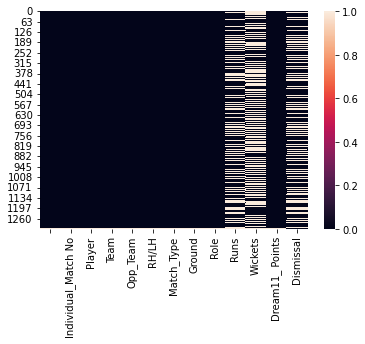

In [7]:
sns.heatmap(daily_match_df.isna())

In [8]:
#Looking at the dataset, we can understand that the missing values in the dismissal column implies that the player did 
#NOT bat in that innings.
#Hence replacing nulls in dismissal column with 'DNB' (Did Not Bat)

daily_match_df['Dismissal'] = daily_match_df['Dismissal'].fillna('DNB')

In [9]:
#missing values in runs and wickets columns mean that the player did not bat or bowl.
#So replacing nulls in runs and wickets with -1 representing that the player did not bat or bowl in that innings.

daily_match_df['Runs'] = daily_match_df['Runs'].fillna(-1)
daily_match_df['Wickets'] = daily_match_df['Wickets'].fillna(-1)

In [10]:
daily_match_df.drop(index=[1320],axis=0,inplace=True) #dropping a null row that came by mistake in the dataset

In [11]:
daily_match_df['Dismissal'] = daily_match_df['Dismissal'].replace('BOLD','BOWLED')

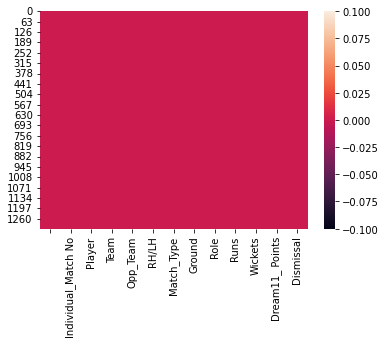

In [12]:
sns.heatmap(daily_match_df.isna())
plt.show()

Number of players played in IPL 2020


In [13]:
print("Total number of players that has been in playing 11 atleast once: ",len(daily_match_df['Player'].unique()))

Total number of players that has been in playing 11 atleast once:  151


Number of players used by each team in IPL 2020¶


In [14]:
temp_df = pd.DataFrame(daily_match_df.groupby('Team')['Player'].unique().apply(lambda x:len(x)))
temp_df.columns = ['No. of Players Used']
temp_df.sort_values('No. of Players Used')

,No. of Players Used
Team,
MI,15
RCB,18
RR,18
KKR,19
CSK,20
DC,20
KXIP,20
SRH,21


In [15]:
colors = ['yellow','deepskyblue','indigo','indianred','blue','red','violet','orangered']


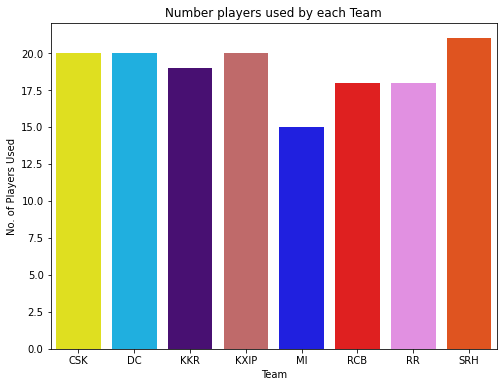

In [16]:
plt.figure(figsize=(8,6))
plt.title("Number players used by each Team")
sns.barplot(y=temp_df.sort_index()['No. of Players Used'],x=temp_df.sort_index().index,palette=colors)
plt.xlabel('Team')
plt.show()

MI used the least number of players whereas SRH used the most number of players.


**Batting**

In [17]:
batting_df = daily_match_df[daily_match_df['Runs']!=-1]  #df with all players who batted in IPL 2020
bowling_df = daily_match_df[daily_match_df['Wickets']!=-1] #df with all players who bowled in IPL 2020

In [18]:
batsman = []
total_runs = []
batsman_team = []
no_of_matches_batted = []
batting_avg = []
no_of_NO = []
freq_out = []
for player in batting_df['Player'].unique():
    batsman.append(player)
    temp_df = batting_df[batting_df['Player'] == player]
    runs = temp_df['Runs'].sum()
    total_runs.append(runs)
    no_of_matches = temp_df.shape[0]
    no_of_matches_batted.append(no_of_matches)
    batsman_out = temp_df[temp_df['Dismissal'] != 'NO']
    number_of_NO = no_of_matches - batsman_out.shape[0]
    no_of_NO.append(number_of_NO)
    if (no_of_matches-number_of_NO) != 0:
        bat_avg = round(runs/(no_of_matches-number_of_NO),2)
    else:
        bat_avg = runs
    batting_avg.append(bat_avg)
    batsman_team.append(temp_df.iloc[0,3])
    if batsman_out.shape[0]>0:
        freq_out.append(batsman_out['Dismissal'].mode()[0])
    else:
        freq_out.append('Never Out')

In [19]:
batting_stats_df = pd.DataFrame({'Player':batsman,
                                 'Team':batsman_team,
                                 'Number of matches batted':no_of_matches_batted,
                                 'Not Outs':no_of_NO,
                                 'Total Runs':total_runs,
                                 'Batting Avg':batting_avg,
                                'Most frequent dissmisal type':freq_out})

In [20]:
batting_stats_df.index = batting_stats_df['Player']
batting_stats_df.drop('Player',axis=1,inplace=True)

Top 5 Players with Highest Batting Average in IPL 2020

In [ ]:
batting_stats_df.sort_values('Batting Avg',ascending=False).head(5)

,Team,Number of matches batted,Not Outs,Total Runs,Batting Avg,Most frequent dissmisal type
Player,,,,,,
Deepak Hooda,KXIP,5,4,101.0,101.00,STUMPING
Tom Curran,RR,4,3,83.0,83.00,CAUGHT
Gurkeerat Singh,RCB,5,5,76.0,76.00,Never Out
W Saha,SRH,4,1,214.0,71.33,CAUGHT
Jadeja,CSK,11,7,232.0,58.00,CAUGHT


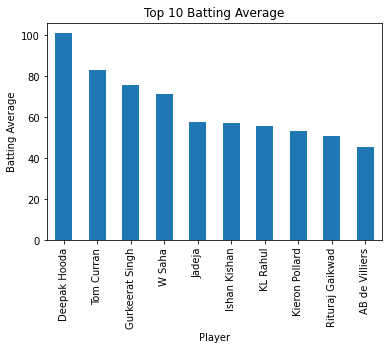

In [ ]:
batting_stats_df.sort_values('Batting Avg',ascending=False).head(10)['Batting Avg'].plot(kind='bar')
plt.title('Top 10 Batting Average')
plt.ylabel('Batting Average')
plt.show()

Top 5 Run Scorers in IPL 2020

In [ ]:
batting_stats_df.sort_values('Total Runs',ascending=False).head(5)

,Team,Number of matches batted,Not Outs,Total Runs,Batting Avg,Most frequent dissmisal type
Player,,,,,,
KL Rahul,KXIP,14,2,670.0,55.83,BOWLED
Shikhar Dhawan,DC,17,3,618.0,44.14,CAUGHT
Warner,SRH,16,2,548.0,39.14,CAUGHT
Shreyas Iyer,DC,17,2,519.0,34.60,CAUGHT
Ishan Kishan,MI,13,4,516.0,57.33,CAUGHT


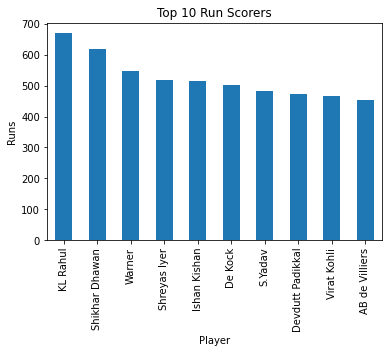

In [ ]:
batting_stats_df.sort_values('Total Runs',ascending=False).head(10)['Total Runs'].plot(kind='bar')
plt.title('Top 10 Run Scorers')
plt.ylabel('Runs')
plt.show()

Top 5 Players with Most Number of Not Outs¶


In [ ]:
batting_stats_df.sort_values('Not Outs',ascending=False).head()

,Team,Number of matches batted,Not Outs,Total Runs,Batting Avg,Most frequent dissmisal type
Player,,,,,,
Kieron Pollard,MI,12,7,268.0,53.60,BOWLED
Jadeja,CSK,11,7,232.0,58.00,CAUGHT
Krunal Pandya,MI,12,6,109.0,18.17,CAUGHT
Hardik Pandya,MI,13,5,281.0,35.12,CAUGHT
Gurkeerat Singh,RCB,5,5,76.0,76.00,Never Out


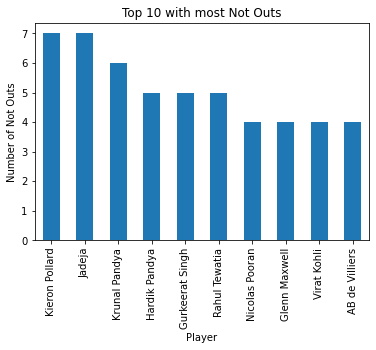

In [ ]:
batting_stats_df.sort_values('Not Outs',ascending=False).head(10)['Not Outs'].plot(kind='bar')
plt.title('Top 10 with most Not Outs')
plt.ylabel('Number of Not Outs')
plt.show()

Total Runs Scored by each team¶


In [ ]:

pd.DataFrame(batting_df.groupby(['Team'])['Runs'].sum())

,Runs
Team,
CSK,2096.0
DC,2656.0
KKR,2123.0
KXIP,2242.0
MI,2646.0
RCB,2163.0
RR,2197.0
SRH,2387.0


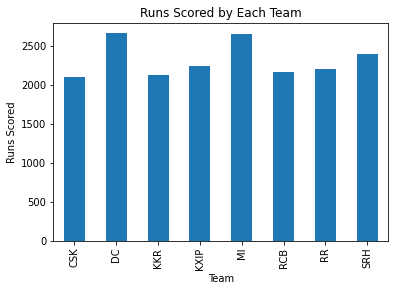

In [ ]:
batting_df.groupby(['Team'])['Runs'].sum().plot(kind='bar')
plt.title('Runs Scored by Each Team')
plt.ylabel('Runs Scored')
plt.show()

Bowling

In [ ]:
bowling_df

,,Individual_Match No,Player,Team,Opp_Team,RH/LH,Match_Type,Ground,Role,Runs,Wickets,Dream11_ Points,Dismissal
5,1.0,M1,Jadeja,CSK,MI,LH,Chasing,Sheikh Zayed,ALL,10.0,2,62.0,LBW
6,1.0,M1,Sam Curran,CSK,MI,LH,Chasing,Sheikh Zayed,ALL,18.0,1,68.0,CAUGHT
7,1.0,M1,Piyush Chawla,CSK,MI,LH,Chasing,Sheikh Zayed,BALL,-1.0,1,31.0,DNB
8,1.0,M1,Deepak Chahar,CSK,MI,RH,Chasing,Sheikh Zayed,BALL,-1.0,2,54.0,DNB
9,1.0,M1,Ngidi,CSK,MI,RH,Chasing,Sheikh Zayed,BALL,-1.0,3,77.0,DNB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,60.0,M16,Kieron Pollard,MI,DC,RH,Defending,Dubai,ALL,9.0,0,15.0,BOWLED
1315,60.0,M16,Coulter Nile,MI,DC,RH,Defending,Dubai,BALL,-1.0,2,68.0,DNB
1316,60.0,M16,J Yadav,MI,DC,RH,Defending,Dubai,ALL,-1.0,1,29.0,DNB
1317,60.0,M16,Boult,MI,DC,LH,Defending,Dubai,BALL,-1.0,,79.0,DNB


In [ ]:
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 5 to 1318
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        679 non-null    float64
 1   Individual_Match No  679 non-null    object 
 2   Player               679 non-null    object 
 3   Team                 679 non-null    object 
 4   Opp_Team             679 non-null    object 
 5   RH/LH                679 non-null    object 
 6   Match_Type           679 non-null    object 
 7   Ground               679 non-null    object 
 8   Role                 679 non-null    object 
 9   Runs                 679 non-null    float64
 10  Wickets              679 non-null    object 
 11  Dream11_ Points      679 non-null    float64
 12  Dismissal            679 non-null    object 
dtypes: float64(3), object(10)
memory usage: 74.3+ KB


In [ ]:
bowling_df['Wickets'].value_counts()

0    288
1    219
2    123
3     40
4      7
5      1
       1
Name: Wickets, dtype: int64

In [ ]:
bowling_df[bowling_df['Wickets']==' ']['Wickets'] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bowling_df[bowling_df['Wickets']==' ']

,,Individual_Match No,Player,Team,Opp_Team,RH/LH,Match_Type,Ground,Role,Runs,Wickets,Dream11_ Points,Dismissal
1317,60.0,M16,Boult,MI,DC,LH,Defending,Dubai,BALL,-1.0,,79.0,DNB


In [ ]:
bowling_df.loc[1317,'Wickets'] = 3

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
bowling_df['Wickets'] = bowling_df['Wickets'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 5 to 1318
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        679 non-null    float64
 1   Individual_Match No  679 non-null    object 
 2   Player               679 non-null    object 
 3   Team                 679 non-null    object 
 4   Opp_Team             679 non-null    object 
 5   RH/LH                679 non-null    object 
 6   Match_Type           679 non-null    object 
 7   Ground               679 non-null    object 
 8   Role                 679 non-null    object 
 9   Runs                 679 non-null    float64
 10  Wickets              679 non-null    int64  
 11  Dream11_ Points      679 non-null    float64
 12  Dismissal            679 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 90.4+ KB


In [ ]:
player = []
no_of_matches = []
tot_wicks = []
wicks_1st_inns = []
wicks_2nd_inns = []
wicks_sharjah = []
wicks_dubai = []
wicks_sheik = []
team = []
for bowler in bowling_df['Player'].unique():
    player.append(bowler)
    team.append(bowling_df[bowling_df['Player'] == bowler]['Team'].values[0])
    
    bowler_df = bowling_df[bowling_df['Player'] == bowler]
    no_of_matches.append(bowler_df.shape[0])
    
    wick1 = np.sum(bowler_df[bowler_df['Match_Type']=='Chasing']['Wickets'])
    wicks_1st_inns.append(wick1)
    
    wick2 = np.sum(bowler_df[bowler_df['Match_Type']=='Defending']['Wickets'])
    wicks_2nd_inns.append(wick2)
    
    tot_wicks.append(wick1+wick2)
    
    
    wickg1 = np.sum(bowler_df[bowler_df['Ground']=='Sharjah']['Wickets'])
    wicks_sharjah.append(wickg1)
    
    wickg2 = np.sum(bowler_df[bowler_df['Ground']=='Dubai']['Wickets'])
    wicks_dubai.append(wickg2)
    
    wickg3 = np.sum(bowler_df[bowler_df['Ground']=='Sheikh Zayed']['Wickets'])
    wicks_sheik.append(wickg3)
    

In [ ]:
bowling_stats_df = pd.DataFrame(
    {
        'Team':team,
        'No. of matches bowled':no_of_matches,
        'Total Wickets':tot_wicks,
        'Wickets in 1st inns':wicks_1st_inns,
        'Wickets in 2nd inns':wicks_2nd_inns,
        'Wickets in Sharjah':wicks_sharjah,
        'Wickets in Dubai':wicks_dubai,
        'Wickets in Sheikh Zayed':wicks_sheik
    },
    index=player

)

In [ ]:
bowling_stats_df.head()

,Team,No. of matches bowled,Total Wickets,Wickets in 1st inns,Wickets in 2nd inns,Wickets in Sharjah,Wickets in Dubai,Wickets in Sheikh Zayed
Jadeja,CSK,13,6,5,1,0,3,3
Sam Curran,CSK,14,13,11,2,4,6,3
Piyush Chawla,CSK,7,6,6,0,3,2,1
Deepak Chahar,CSK,14,12,8,4,1,9,2
Ngidi,CSK,4,9,9,0,1,2,6


In [ ]:
bowling_stats_df = bowling_stats_df.sort_values('Total Wickets',ascending = False)

In [ ]:
bowling_stats_df.head()

,Team,No. of matches bowled,Total Wickets,Wickets in 1st inns,Wickets in 2nd inns,Wickets in Sharjah,Wickets in Dubai,Wickets in Sheikh Zayed
Rabada,DC,17,30,4,26,6,16,8
Bumrah,MI,15,27,3,24,4,10,13
Boult,MI,15,25,8,17,7,10,8
Nortje,DC,16,22,4,18,5,14,3
Y Chahal,RCB,15,21,8,13,2,9,10


Wickets taken by each team

In [ ]:
pd.DataFrame(bowling_stats_df.groupby('Team')['Total Wickets'].sum())

,Total Wickets
Team,
CSK,71
DC,94
KKR,65
KXIP,72
MI,93
RCB,75
RR,61
SRH,90
